In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import warnings
import time

import Featurizer as ft

warnings.filterwarnings('ignore')

%matplotlib inline
sns.set(style='white', context='notebook', palette='deep')
%config InlineBackend.figure_format = 'png' #set 'png' here when working on notebook
pd.set_option('display.max_columns', 50)


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import Imputer
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [3]:
plt.style.use('default')
plt.rcParams['figure.figsize'] = [12.0,8.0]

In [4]:
df_train = pd.read_csv("../data/palabras.csv")

## Pre-processing

In [5]:
X = df_train.drop("precio", axis=1)
y = df_train['precio']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)

In [6]:
X_train_submit = X_train.copy()

In [7]:
import category_encoders as ce

OHE = ce.OneHotEncoder( handle_unknown='ignore', use_cat_names=True)
BE = ce.BinaryEncoder( handle_unknown='ignore')

In [8]:
X_train = ft.preprocess(X_train, OHE, BE, 'train')
X_test = ft.preprocess(X_test, OHE, BE, 'test')

--- 2.99696683883667 seconds ---
--- 0.5163087844848633 seconds ---


In [9]:
print(f"Original shapes: X={X.shape} y={y.shape}")
print(f"Train shapes: X={X_train.shape} y={y_train.shape}")
print(f"Test  shapes: X={X_test.shape}  y={y_test.shape}")

Original shapes: X=(240000, 80) y=(240000,)
Train shapes: X=(180000, 143) y=(180000,)
Test  shapes: X=(60000, 143)  y=(60000,)


## Feature Selection

In [10]:
#from sklearn.feature_selection import SelectKBest

In [11]:
#selection = SelectKBest(k=40)
#x_features = selection.fit_transform(X_train, y_train)
#columns = np.asarray(X_train.columns.values)
#support = np.asarray(selection.get_support())
#columns_with_support = columns[support]

In [29]:
#columns_with_support

1574767056.31204

###### Training

In [10]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 100,random_state = 1,
                                  max_depth = 10, 
                                )

model = GradientBoostingRegressor(n_estimators=2000, learning_rate=0.1,
     max_depth=5, random_state=0, loss='ls',verbose=10)

In [17]:
start_time = time.time()
model.fit(X_train, y_train)
print("--- %s seconds ---" % (time.time() - start_time))

      Iter       Train Loss   Remaining Time 
         1 4127937222905.6470          107.53m
         2 3707755892613.8730          106.56m
         3 3366154612102.0654          106.50m
         4 3080023556053.6548          106.14m
         5 2842273999033.3682          105.97m
         6 2640553517606.8662          107.89m
         7 2476763018114.5459          113.38m
         8 2337881265779.8779          116.60m
         9 2214761419222.2012          119.25m
        10 2111242470507.4375          120.19m
        11 2027037006549.7935          119.14m
        12 1947789995476.4402          118.26m
        13 1880054227358.7244          117.17m
        14 1825656140870.7698          116.06m
        15 1774751012046.7749          115.28m
        16 1732297096528.5974          114.79m
        17 1692770867176.1843          113.93m
        18 1647981496695.5371          113.44m
        19 1618266732774.5906          112.64m
        20 1587501433411.6257          112.38m
        21 156

       175 961955193074.2191           87.13m
       176 960965059070.9254           87.15m
       177 960483387329.7263           87.00m
       178 960084049635.8182           86.87m
       179 959204944975.3096           86.97m
       180 958464769865.3965           86.91m
       181 956894104645.5282           87.08m
       182 954727638984.9515           86.99m
       183 954306454861.1390           86.76m
       184 952199634985.7871           86.63m
       185 951290318256.2211           86.48m
       186 950592957398.5332           86.33m
       187 948677915009.4230           86.30m
       188 947699387171.3945           86.37m
       189 946830892163.8761           86.52m
       190 945868263985.7057           86.52m
       191 945194103551.6504           86.35m
       192 944490185978.9928           86.34m
       193 943608499902.2577           86.28m
       194 942936024192.8301           86.15m
       195 942198133072.6610           85.99m
       196 941837399850.4558      

       354 815047461586.8479           76.85m
       355 814820886689.2960           76.75m
       356 814423272480.7501           76.69m
       357 814156631946.8424           76.54m
       358 813819065889.7135           76.43m
       359 812459553539.2660           76.32m
       360 811221170652.2721           76.30m
       361 810421654416.1542           76.26m
       362 810136592122.9163           76.20m
       363 809415518134.7953           76.17m
       364 808520823654.8724           76.13m
       365 807481804949.7078           76.09m
       366 807150917732.3927           76.01m
       367 806063793516.7172           75.99m
       368 805528939135.5741           75.98m
       369 805392374678.0859           75.87m
       370 804357200119.3929           75.82m
       371 803589162736.2999           75.86m
       372 803006471079.0645           75.86m
       373 802575314952.8966           75.84m
       374 802389474891.5035           75.75m
       375 802298719269.8683      

       533 733466527677.3236           68.30m
       534 732939018370.7332           68.26m
       535 732479928161.3353           68.23m
       536 732209477955.1158           68.18m
       537 732005001010.4808           68.12m
       538 731835147712.3033           68.07m
       539 731590525884.8566           68.05m
       540 731501593970.2109           67.97m
       541 731427302090.6144           67.89m
       542 731393524555.3550           67.80m
       543 731030895012.7125           67.77m
       544 730779160814.8358           67.77m
       545 730551540618.3453           67.77m
       546 730183678155.4817           67.74m
       547 729418310661.8895           67.71m
       548 729076037763.7032           67.70m
       549 728758093140.9901           67.66m
       550 728383201961.1459           67.62m
       551 727848713928.3518           67.59m
       552 727322704208.5436           67.51m
       553 726674449284.4553           67.44m
       554 726329024891.8542      

       712 674448144472.1676           59.73m
       713 674233426862.2523           59.66m
       714 673906509590.6095           59.65m
       715 673547669404.6846           59.62m
       716 673131883217.3163           59.57m
       717 672860924671.6146           59.53m
       718 672639878546.9528           59.46m
       719 672363437238.1420           59.42m
       720 672188616395.7926           59.37m
       721 671930300125.4044           59.33m
       722 671619017791.2676           59.31m
       723 671371089875.0723           59.27m
       724 671266558764.1132           59.23m
       725 671115692465.4075           59.19m
       726 670937493262.7201           59.17m
       727 670711721652.8146           59.12m
       728 670406368777.0039           59.08m
       729 670175973755.5525           59.01m
       730 669942101938.6042           58.94m
       731 669836252762.6987           58.87m
       732 669079436665.3027           58.82m
       733 668888201737.9379      

       891 629351394098.9358           50.99m
       892 629263350921.4254           50.94m
       893 629072322469.9392           50.89m
       894 628946434423.0542           50.83m
       895 628707920604.5076           50.81m
       896 628579298642.4943           50.75m
       897 628497620867.2623           50.71m
       898 628370934656.4990           50.69m
       899 628196511056.3992           50.64m
       900 628020401320.5699           50.59m
       901 627908125019.2500           50.52m
       902 627877992185.7056           50.45m
       903 627725774006.5417           50.39m
       904 627483045951.3705           50.33m
       905 627164262970.4434           50.27m
       906 627036083516.6422           50.24m
       907 626737161149.1823           50.21m
       908 626483164550.0244           50.19m
       909 626331111337.8414           50.14m
       910 626003705821.9207           50.10m
       911 625675308004.1416           50.07m
       912 625482810080.2214      

      1070 590487655722.4679           42.61m
      1071 590350859016.4532           42.55m
      1072 590208048328.8633           42.51m
      1073 589940058124.5333           42.46m
      1074 589747063196.3685           42.42m
      1075 589605389551.7885           42.37m
      1076 589450781495.6176           42.33m
      1077 589246555441.9348           42.30m
      1078 589175441258.2144           42.24m
      1079 589090938520.9424           42.19m
      1080 588899375685.0603           42.13m
      1081 588745756083.6628           42.09m
      1082 588593200852.7972           42.04m
      1083 588437799677.9857           41.98m
      1084 588313232201.2292           41.93m
      1085 588257174102.5950           41.87m
      1086 588237245814.7168           41.81m
      1087 588167778567.7174           41.75m
      1088 588140400971.2537           41.69m
      1089 588042050158.3881           41.65m
      1090 587850420755.9791           41.62m
      1091 587723406641.7404      

      1249 559308594264.1566           34.24m
      1250 559237617526.5754           34.18m
      1251 559084793361.3989           34.13m
      1252 558995598088.9973           34.08m
      1253 558897377686.1393           34.02m
      1254 558775297518.2130           33.97m
      1255 558582422724.0845           33.93m
      1256 558366211496.5696           33.90m
      1257 558199980008.6997           33.86m
      1258 558043080992.8706           33.82m
      1259 557947497150.3661           33.77m
      1260 557920537152.3688           33.71m
      1261 557837387354.4161           33.66m
      1262 557800810491.0742           33.61m
      1263 557612585165.6226           33.56m
      1264 557521356321.4996           33.50m
      1265 557387625810.3901           33.46m
      1266 557290562099.4796           33.41m
      1267 556991759777.1683           33.36m
      1268 556775893113.5437           33.32m
      1269 556595859048.1746           33.29m
      1270 556536957041.6395      

      1428 532342499412.9141           26.14m
      1429 532234420859.6733           26.10m
      1430 532142999735.2227           26.04m
      1431 531995816413.2049           26.00m
      1432 531794959917.5806           25.95m
      1433 531711782381.4316           25.90m
      1434 531602941077.0112           25.85m
      1435 531365230337.8967           25.80m
      1436 531244836858.8129           25.75m
      1437 531131858387.0919           25.70m
      1438 531070006707.8351           25.65m
      1439 530924018226.6727           25.61m
      1440 530790644682.3338           25.57m
      1441 530721023239.6854           25.53m
      1442 530563842471.2847           25.48m
      1443 530371058748.1046           25.45m
      1444 530191879109.5303           25.41m
      1445 530012654790.4376           25.37m
      1446 529723209299.2548           25.32m
      1447 529588596867.4682           25.27m
      1448 529576009998.8897           25.22m
      1449 529484820565.4230      

      1607 505764429363.7704           18.00m
      1608 505625894066.7737           17.95m
      1609 505473548265.5783           17.91m
      1610 505465699450.3812           17.86m
      1611 505340656372.8069           17.81m
      1612 505252790022.0986           17.76m
      1613 505097337430.5237           17.71m
      1614 504960249522.8510           17.66m
      1615 504806585247.5720           17.61m
      1616 504671659113.3089           17.57m
      1617 504561398123.2237           17.53m
      1618 504458815273.1244           17.49m
      1619 504362613228.7296           17.44m
      1620 504275046643.3755           17.40m
      1621 504136833660.2610           17.35m
      1622 503945567603.7239           17.31m
      1623 503880217291.7522           17.26m
      1624 503597868478.5552           17.22m
      1625 503504159418.7822           17.17m
      1626 503341180783.8503           17.13m
      1627 503146212177.0054           17.08m
      1628 503064643116.1324      

      1786 482541156646.6990            9.81m
      1787 482510235215.8463            9.76m
      1788 482387671922.3815            9.71m
      1789 482213093789.3748            9.67m
      1790 482148465396.2305            9.62m
      1791 482030250657.1776            9.57m
      1792 481842241254.4972            9.53m
      1793 481688381755.8591            9.48m
      1794 481645568312.1613            9.44m
      1795 481604241439.4008            9.39m
      1796 481553540935.9987            9.35m
      1797 481457691106.6996            9.30m
      1798 481364580567.8400            9.25m
      1799 481288334028.7037            9.21m
      1800 481170399987.9300            9.16m
      1801 481088884670.1188            9.12m
      1802 481007890770.6689            9.07m
      1803 480921407183.5364            9.02m
      1804 480879363899.1838            8.97m
      1805 480854483772.1918            8.93m
      1806 480742312371.0263            8.88m
      1807 480576909846.0613      

      1965 463623738258.1888            1.59m
      1966 463468967222.5604            1.55m
      1967 463334426585.0986            1.50m
      1968 463234800330.9022            1.46m
      1969 463088293924.5511            1.41m
      1970 462983745194.9944            1.37m
      1971 462811071481.7139            1.32m
      1972 462751248365.4973            1.27m
      1973 462626631421.2516            1.23m
      1974 462477274525.0901            1.18m
      1975 462421492294.5436            1.14m
      1976 462338589492.6006            1.09m
      1977 462279782576.5728            1.05m
      1978 462133644541.9830            1.00m
      1979 461996715338.9904           57.36s
      1980 461915799355.2276           54.62s
      1981 461800083450.2154           51.88s
      1982 461664249971.0549           49.15s
      1983 461485347726.6857           46.42s
      1984 461365698065.2565           43.69s
      1985 461153095046.2750           40.96s
      1986 461081232196.8660      

## Predicciones

In [18]:
ft.predecir(model, X_train, y_train, X_test, y_test)

Entrenamiento: 90.0689%
Testeo: 82.4591%.
Mean abs error: 533562.8777.


In [19]:
plt.rcParams["figure.figsize"] = [15, 15]

importancia = model.feature_importances_

d = {'x':X_train.columns,'y':importancia}

df_importancia = pd.DataFrame(d)

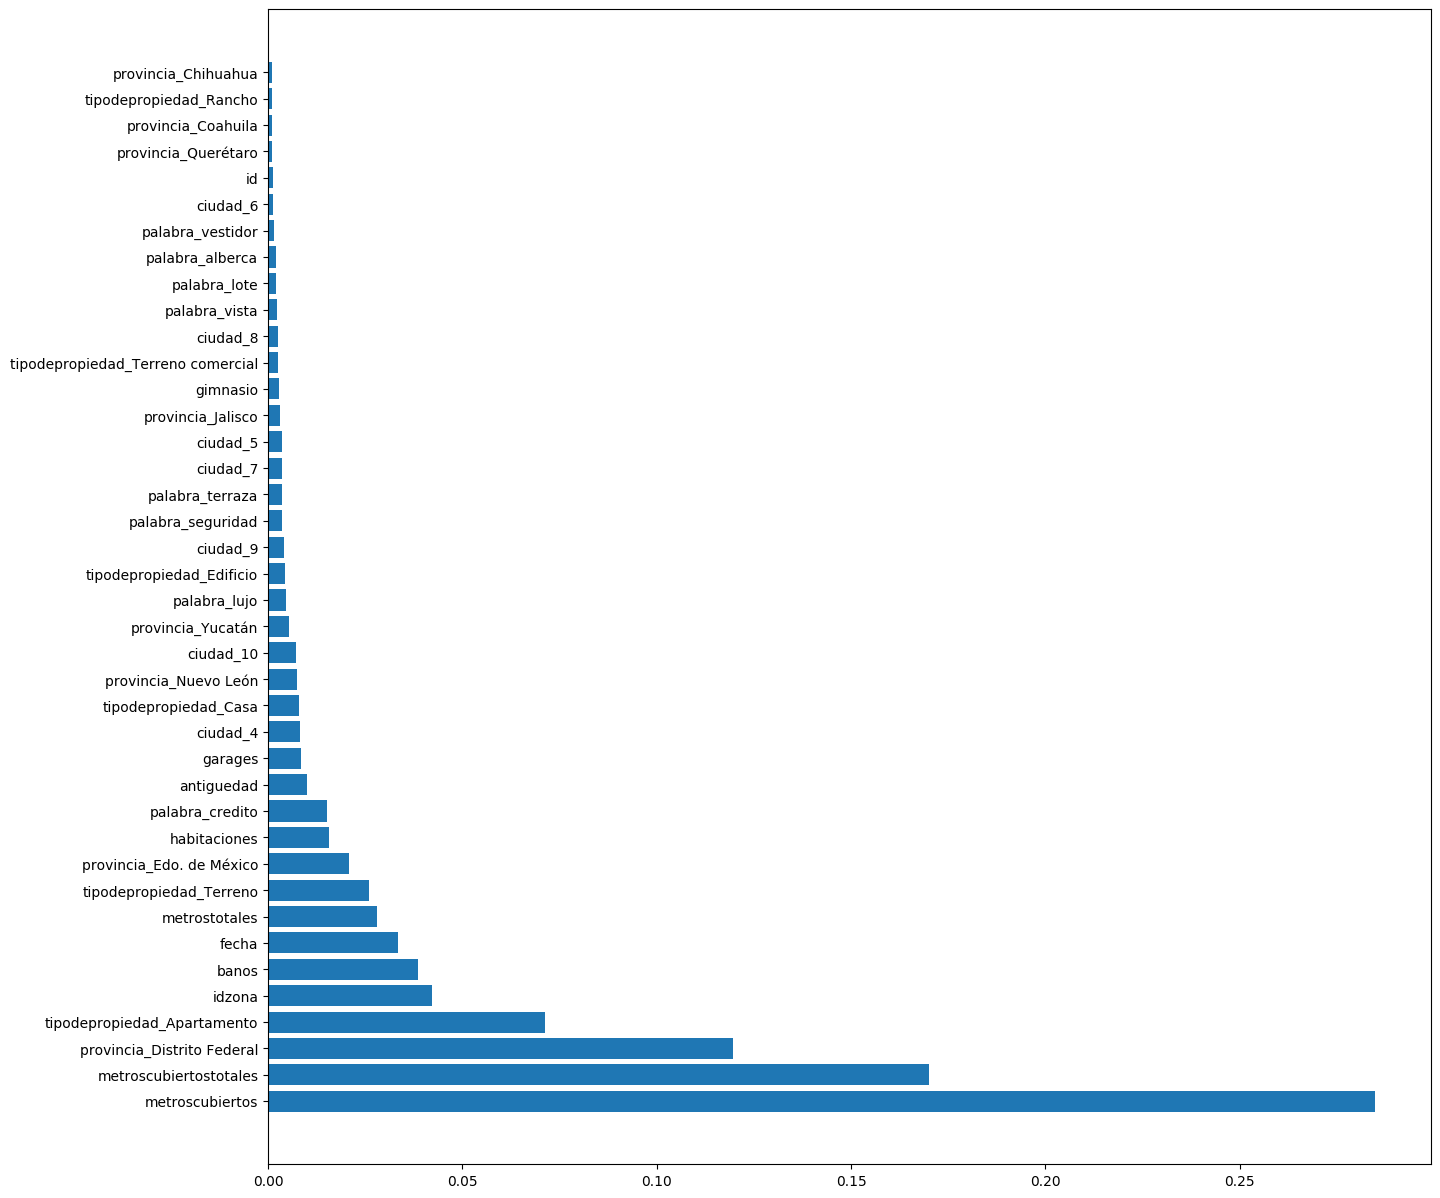

In [25]:
importancia = df_importancia.sort_values(by="y",ascending=False).head(40)
ax = plt.barh(importancia.x,importancia.y)

## Submission

In [20]:
df_test = pd.read_csv('../data/test.csv')

In [21]:
df = df_test.copy()
df = ft.init_test(df)

In [22]:
df = ft.preprocess(df, OHE, BE, 'test')

--- 0.6564114093780518 seconds ---


In [24]:
submit_prediction = model.predict( df )

In [23]:
#cols_diff = []
#ft = X_train.columns.values
#fs = df.columns.values
#for feat in fs:
#    if feat not in ft:
#        cols_diff.append(feat)
        
#display(cols_diff)        

In [ ]:
#pd.concat([df_test[['id']], pd.Series(submit_prediction)], axis=1).rename(columns={0:"target"}).to_csv("../data/submission13.csv", index=False)

In [25]:
from submission_helper import submission_output

output = submission_output(df_test, submit_prediction)

nombre_submit = 'submission20.csv'

output.to_csv('../data/'+nombre_submit, index=False)